In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns

##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
CLASSES = [0, 1, 2, 3]


###################################
####     SKIT-LEARN DEPS       ####
###################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [2]:
def seed_all(seed=42):

    random.seed(seed)
    np.random.seed(seed)
    print("[ Using Seed : ", seed, " ]")

####################################
#####   SEED ALL EXPERIMENTS   #####
####################################
seed_all()

[ Using Seed :  42  ]


In [3]:
import sys
sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

In [4]:
def plot_conf_matrix(model, X, Y):
    predictions = model.predict(X)
    cm = confusion_matrix(Y, predictions, labels=CLASSES)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=CLASSES)
    disp.plot()
    plt.show()

### Prepare data and split it!

In [8]:
data_path = p_join('..', '..', 'data_2')
FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if 'L=10.6' in item]
X, Y = utils.create_dataset(FOLDERS)
X = utils.normalize_data(X)

100%|███████████████████████████████████████████| 16/16 [00:01<00:00,  8.47it/s]


In [13]:
### Train SVC
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, random_state=0)
model = svm.SVC(C=1000, n_jobs=-1)
model.fit(X_train, y_train)
pass

### Plot conf Matrix

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


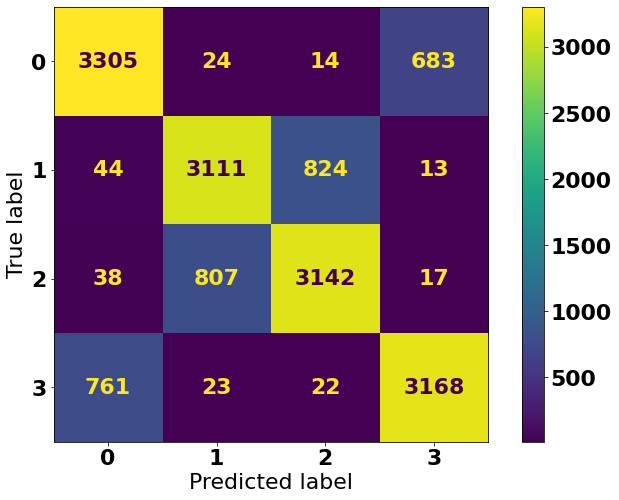

In [16]:
plot_conf_matrix(model, X_test, y_test)
pass

In [17]:
# Calc Accuracy:
predictions = model.predict(X_test)
acc = (predictions == y_test).sum()/len(predictions)
acc

0.7955738934733684

In [19]:
model = svm.SVC(C=2000)
model.fit(X_train, y_train)
pass

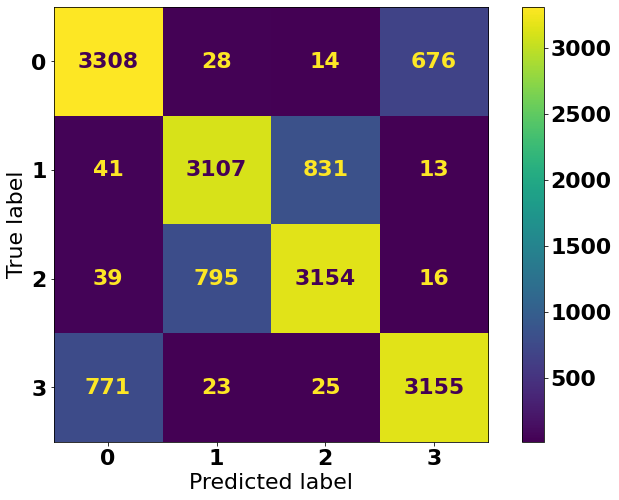

In [20]:
plot_conf_matrix(model, X_test, y_test)
pass

In [21]:
predictions = model.predict(X_test)
acc = (predictions == y_test).sum()/len(predictions)
acc

0.7954488622155539

### Plot Coufusion Mlp models test

In [5]:
import os
import sys
from os.path import join as p_join

sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

In [6]:
import torch
from utils import dl_models
import pandas as pd
import numpy as np

In [7]:
def create_dataset(l='1.6'):
    utils.seed_all()
    data_path = p_join('..', '..', 'data_2')
    FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if l in item]
    X, Y = utils.create_dataset(FOLDERS)
    X = utils.normalize_data(X)
    return X, Y

In [8]:
def get_loaderes(l='1.6', add_axis=False):
    X, Y = create_dataset(l)
    if add_axis:
        X = np.expand_dims(X, axis=1)
    return utils.create_dataloaders(X, Y)

In [9]:
def multy_cross_test(model, ckpts_paths, add_axis=False):
    L = ['1.6', '6.6', '7.6', '8.6', '10.6']

    data = {p: [] for p in ckpts_paths}

    for ckpt_path in ckpts_paths:
        print(ckpt_path)
        ckpt = torch.load(p_join('..', 'dl', ckpt_path, 'model_best.ckpt'))
        model.load_state_dict(ckpt)
        for l in L:
            _, loader = get_loaderes(l, add_axis)
            acc = utils.test_model(model, loader, device='cpu')
            data[ckpt_path].append(acc)
            
    df = pd.DataFrame.from_dict(data, orient='index', columns=[f'L={l}' for l in L])
    return df

In [10]:
model = dl_models.MlpNeLight(in_features=16)
ckpts_paths = ['mlp_ckpts_L_1_6', 'mlp_ckpts_L_6_6',
               'mlp_ckpts_L_7_6', 'mlp_ckpts_L_8_6', 'mlp_ckpts_L_10_6']
df = multy_cross_test(model, ckpts_paths)

mlp_ckpts_L_1_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 269.91it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 313.80it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 276.09it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 313.59it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 305.78it/s]


mlp_ckpts_L_6_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 297.78it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 271.14it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 242.37it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 320.91it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 312.39it/s]


mlp_ckpts_L_7_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 327.16it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 323.83it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 327.24it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 326.22it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 303.39it/s]


mlp_ckpts_L_8_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 305.90it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 305.73it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 303.70it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 325.35it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 340.92it/s]


mlp_ckpts_L_10_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 332.65it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 323.97it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 332.93it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 329.19it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:00<00:00, 323.04it/s]


In [6]:
df

L=1.6      L=6.6      L=7.6      L=8.6     L=10.6
mlp_ckpts_L_1_6   50.894741  21.544112  21.927014  31.405798  30.022662
mlp_ckpts_L_6_6   15.667735  66.015472  40.947097  26.334297  25.529421
mlp_ckpts_L_7_6   21.372197  39.282644  70.461827  33.632883  24.349457
mlp_ckpts_L_8_6   25.490349  31.734000  39.290459  73.337501  32.359147
mlp_ckpts_L_10_6  36.125654  24.404157  27.209502  33.679769  81.323748

### Plot Coufusion Cnn + Mlp models test

In [17]:
model = dl_models.ConvMlpNet()
ckpts_paths = ['cnn_ckpts_L_1_6', 'cnn_ckpts_L_6_6',
               'cnn_ckpts_L_7_6', 'cnn_ckpts_L_8_6', 'cnn_ckpts_L_10_6']
df = multy_cross_test(model, ckpts_paths, add_axis=True)

cnn_ckpts_L_1_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 153.70it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 168.44it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 159.79it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 166.86it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 169.30it/s]


cnn_ckpts_L_6_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 152.90it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 146.55it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 170.08it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 174.79it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 153.04it/s]


cnn_ckpts_L_7_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 161.71it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 165.20it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 163.11it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 159.20it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 161.51it/s]


cnn_ckpts_L_8_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 162.42it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 155.80it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 163.29it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 165.89it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 142.56it/s]


cnn_ckpts_L_10_6
[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 151.78it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 161.70it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 164.71it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 151.84it/s]


[ Using Seed :  42  ]


100%|████████████████████████████████████████| 200/200 [00:01<00:00, 168.79it/s]


In [18]:
df

L=1.6      L=6.6      L=7.6      L=8.6     L=10.6
cnn_ckpts_L_1_6   50.910370  23.325779  25.935766  26.982887  25.130890
cnn_ckpts_L_6_6   21.833242  67.390795  39.110729  30.319606  26.857857
cnn_ckpts_L_7_6   25.795108  37.969837  70.805658  34.117371  26.248339
cnn_ckpts_L_8_6   29.749160  30.100805  36.172540  73.806361  33.203094
cnn_ckpts_L_10_6  28.795812  27.006330  28.647339  34.375244  79.831210

### Plot Coufusion SVM models test

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

CONFIG = {'scoring': 'accuracy',
          'cv': 5,
          'n_jobs': -1}

L = ['1.6', '6.6', '7.6', '8.6', '10.6']

data = {l: [] for l in L}

for l in L:
    model = svm.SVC(C=1000)
    X, Y = create_dataset(l)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model.fit(X_train, Y_train)
    print(f'Current L={l}')
    for l in L:
        X, Y = create_dataset(l)
        _, X_test, _, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        acc = accuracy_score(Y_test, model.predict(X_test))
        data[l].append(acc)

df = pd.DataFrame.from_dict(data, orient='index', columns=[f'L={l}' for l in L])

[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.20it/s]


Current L=1.6
[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.17it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.77it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 20.91it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 19.48it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 20.22it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.68it/s]


Current L=6.6
[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.59it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 20.38it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.25it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.68it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.95it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.93it/s]


Current L=7.6
[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 18.74it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.77it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 23.83it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.31it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.98it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.82it/s]


Current L=8.6
[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.85it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.01it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.34it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.42it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 22.30it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.41it/s]


Current L=10.6
[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 20.75it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.90it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.68it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.63it/s]


[ Using Seed :  42  ]


100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 21.73it/s]


In [26]:
df

L=1.6     L=6.6     L=7.6     L=8.6    L=10.6
1.6   0.494647  0.194421  0.176369  0.219583  0.354927
6.6   0.207080  0.691099  0.393452  0.321403  0.207002
7.6   0.237556  0.423771  0.723373  0.391498  0.236305
8.6   0.311245  0.294366  0.348363  0.735094  0.350004
10.6  0.303118  0.222943  0.254591  0.291709  0.799719